# Notebook 1: Insertion Sort
## Author: Sid Nadendla
## Course: CS 2500 (Algorithms) @ Missouri S&T

### Prerequisite Packages

We will be using numpy, matplotlib library in this jupyter notebook.

In [1]:
# Install all the prerequisite packages from the Terminal
!pip install numpy
!pip install matplotlib

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
import copy

## Insertion Sort with Print Statements

In [3]:
def insertion_sort_print(array):
    len_array = len(array)
    for j in range(1, len_array):
        key = array[j]
        i = j - 1
        while((i>=0) and (array[i]>key)):
            array[i+1] = array[i] 
            i = i - 1
        array[i+1] = key
        print(f"Loop {j}: {array}")
    return array

## Check for Correctness

In [4]:
def is_sorted(array):
    len_array = len(array)
    status = True
    i = 0
    while (i<len_array-1):
        if (array[i]>array[i+1]):
            status = False
        i = i + 1
    if (not status):
        print("Array is not sorted \n")
    else:
        print("Array is sorted \n")

## Test input for insertion_sort_print and is_sorted functions

In [5]:
array =  [5, 2, 4, 6, 1, 3]

print(f"Input : {array}")
is_sorted(array)

array_out = insertion_sort_print(array)

print(f"\nOutput : {array}")
is_sorted(array_out)

Input : [5, 2, 4, 6, 1, 3]
Array is not sorted 

Loop 1: [2, 5, 4, 6, 1, 3]
Loop 2: [2, 4, 5, 6, 1, 3]
Loop 3: [2, 4, 5, 6, 1, 3]
Loop 4: [1, 2, 4, 5, 6, 3]
Loop 5: [1, 2, 3, 4, 5, 6]

Output : [1, 2, 3, 4, 5, 6]
Array is sorted 



## Plotting Run-Time Complexity

In [6]:
# Insertion sort without print statements
def insertion_sort(array):
    len_array = len(array)
    for j in range(1, len_array):
        key = array[j]
        i = j - 1
        while((i>=0) and (array[i]>key)):
            array[i+1] = array[i] 
            i = i - 1
        array[i+1] = key

In [7]:
# Generate a random array of given size.
def generate_random_input(size):
    arr = np.random.randint(0, 20000, size = size)
    return arr

In [8]:
# Number of random arrays generated in this experiment
monte_carlo_runs = 500

# Range of array sizes considered
start_array = 10
end_array = 200
increments = 10

# Initiate average and worst case run-time
avg_time_taken = [0]*(end_array//increments)
worst_time_taken = [0]*(end_array//increments)

# Run-time experiments for random arrays of a given size
count = 0
for curr_array_size in range(start_array, end_array+1, increments):  
    run_times = []
    # Given a fixed array size, generate one random array and compute its run-time
    for iteration in range(monte_carlo_runs):             
        array = generate_random_input(curr_array_size)    # Generate random array
        start = time.time()                               # Record state time
        insertion_sort(array)
        end = time.time()                                 # Record end time
        run_times.append(end - start)                     # Instantaneous ruun-time for a specific random input         

    avg_time_taken[count] = sum(run_times)/len(run_times) # Empirical average of run-time
    worst_time_taken[count] = max(run_times)              # Worst case run time across various random experiments
    count += 1
#print(time_taken)

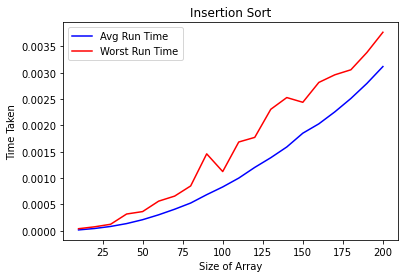

In [9]:
# Data Coordinates
x = np.arange(start_array, end_array+1, increments)
y = np.array(avg_time_taken)
z = np.array(worst_time_taken)

# Plot
plt.plot(x,y,'b',label='Avg Run Time') 
plt.plot(x,z,'r',label='Worst Run Time') 

# Add Title
plt.title("Insertion Sort") 

# Add Axes Labels
plt.xlabel("Size of Array") 
plt.ylabel("Time Taken") 

# Display
plt.legend()
plt.show()

### References
1. [Big o cheat sheet](https://www.bigocheatsheet.com/)
2. [Timeit example](https://www.geeksforgeeks.org/timeit-python-examples/)